In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

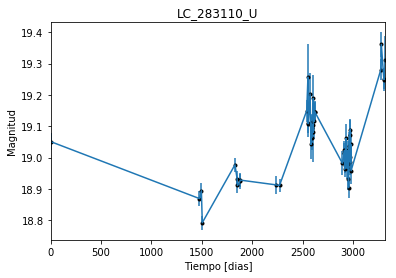

In [2]:
data = np.genfromtxt('LC_283110_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_283110_U')
plt.savefig("LC_283110_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

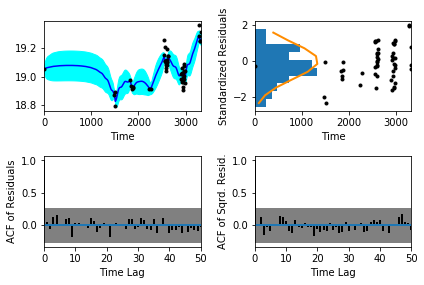

In [5]:
sample.assess_fit()

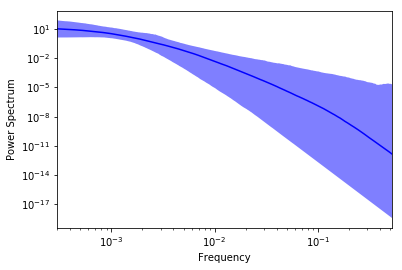

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

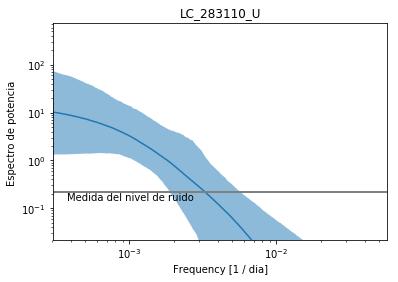

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_283110_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_283110_U')

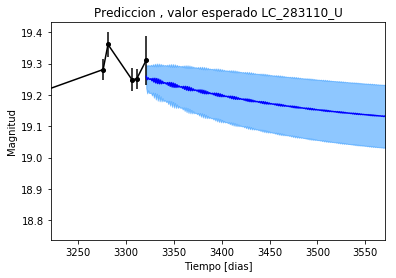

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_283110_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_283110_U')

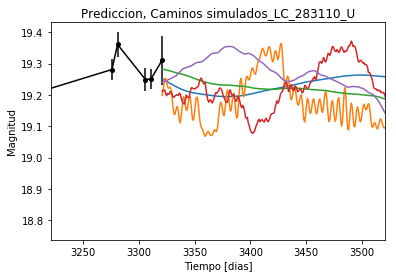

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_283110_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


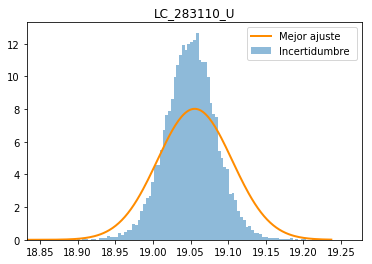

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_283110_U')
plt.savefig("Mejor_ajuste_LC_283110_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_283110_U')

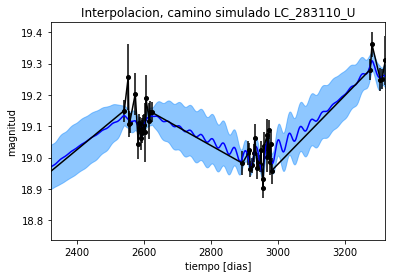

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_U')

Text(0.5,1,'Interpolacion, camino simulado LC_283110_U')

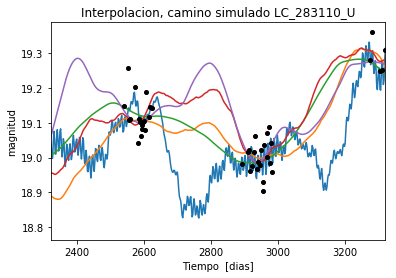

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 733.335974919
Median: 0.00884180977526
Standard deviation: 0.191095218129
68% credibility interval: [ 0.00077199  0.1565697 ]
95% credibility interval: [  3.56384616e-04   7.71382414e-01]
99% credibility interval: [  3.13796236e-04   9.87267327e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1013.78795637
Median: 0.00196188625312
Standard deviation: 0.0866088295921
68% credibility interval: [ 0.00049248  0.02913374]
95% credibility interval: [ 0.00033077  0.2741765 ]
99% credibility interval: [  3.05278196e-04   6.87990075e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 660.446092171
Median: 0.0207589170855
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1252.47718216
Median: 99.2708722986
Standard deviation: 1.62582840808
68% credibility interval: [  97.467839    100.38915406]
95% credibility interval: [  94.93855099  101.21798837]
99% credibility interval: [  93.05498002  102.85116152]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 912.350662463
Median: 0.651978901778
Standard deviation: 2.27301949933
68% credibility interval: [ 0.05372738  4.00157707]
95% credibility interval: [ 0.01477172  7.41514169]
99% credibility interval: [  0.01046057  10.3820423 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 548.472620904
Median: 0.421703240413
Standard deviation: 8.65991815134
68% credibility interval: [ 0.01378752  8.3438373 ]
95% credibility interval: [  6.25917362e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16520.5457031
Median: 1.44101087233e-24
Standard deviation: 9.72182536145e+91
68% credibility interval: [  1.63680310e-53   2.20792902e-06]
95% credibility interval: [  5.22401873e-98   2.61024456e+02]
99% credibility interval: [  1.77680356e-133   1.05358508e+090]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3322.66846659
Median: 19.0344730986
Standard deviation: 0.0871994471652
68% credibility interval: [ 18.96076865  19.10297083]
95% credibility interval: [ 18.86107689  19.2073507 ]
99% credibility interval: [ 18.74337666  19.32063523]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1290.68745509
Median: 0.00876138209676
Standard deviation: 0.22797501051
68% credibility interval: [ 0.          0.31830816]
95% credibility interval: [ 0.          0.83023107]
99% credibility interval: [ 0.         0.9933338]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1290.68745509
Median: 0.00876138209676
Standard deviation: 0.22797501051
68% credibility interval: [ 0.          0.31830816]
95% credibility interval: [ 0.          0.83023107]
99% credibility interval: [ 0.         0.9933338]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 943.160175534
Median: 0.0
Standard deviation: 0.000504537007591
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1252.47718216
Median: 99.2708722986
Standard deviation: 1.62582840808
68% credibility interval: [  97.467839    100.38915406]
95% credibility interval: [  94.93855099  101.21798837]
99% credibility interval: [  93.05498002  102.85116152]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2342.36774563
Median: 0.0232045160552
Standard deviation: 0.039560080273
68% credibility interval: [ 0.01365318  0.04804433]
95% credibility interval: [ 0.00896047  0.11827263]
99% credibility interval: [ 0.00694258  0.25321194]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1098.62754794
Median: 1.15362955373
Standard deviation: 0.197779312622
68% credibility interval: [ 0.97390888  1.35626494]
95% credibility interval: [ 0.82374238  1.59912171]
99% credibility interval: [ 0.74147449  1.76360762]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 758.831326857
Median: 0.000130086973338
Standard deviation: 0.172106975376
68% credibility interval: [  1.99859742e-06   6.48842872e-03]
95% credibility interval: [  5.69231453e-09   3.21997102e-01]
99% credibility interval: [  1.49150247e-95   1.18276919e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 733.335974919
Median: (-0.0555547292688+0j)
Standard deviation: 1.86907589266
68% credibility interval: [-0.98375641+0.j         -0.00485058-0.39724751j]
95% credibility interval: [ -4.84673865e+00+0.j         -2.23923058e-03-0.9283216j]
99% credibility interval: [ -6.20318357e+00+0.j          -1.97163990e-03-3.73907065j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1013.78795637
Median: (-0.0123268948799+0j)
Standard deviation: 1.5322948016
68% credibility interval: [-0.18305268+0.j         -0.00309433+0.00657007j]
95% credibility interval: [-1.72270173+0.00912433j -0.00207827+0.01055532j]
99% credibility interval: [ -4.32276913e+00+4.11296302j  -1.91811947e-03+0.65129988j]
Posterior summary for parameter ar_roots 